https://zablo.net/blog/post/pytorch-resnet-mnist-jupyter-notebook-2021/

DATA PREPARATION

Dataset Menggunakan MNIST yang memiliki 60.000 train set dan 10.000 test set. Setiap gambar memiliki ukuran 28 x 28 pixel dan 1 channel karena grayscale.

train dataset: 60000
test dataset : 10000
train loader : 938
test loader  : 157


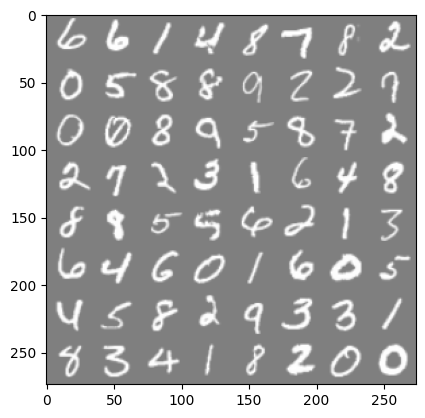

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms
from torchvision.models import resnet50
import torch.nn as nn
import torchvision
from tqdm import tqdm


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()

    # plt.figure(figsize=(1, 1))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()



BATCH_SIZE = 64
NUM_CLASSES = 10
EPOCHS = 20
LEARNING_RATE = 0.01
WEIGHT_DECAY = 0.001
MOMENTUM = 0.9

# data augmentation
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    # transforms.Normalize(
    #     mean=[0.4914, 0.4822, 0.4465],
    #     std=[0.2023, 0.1994, 0.2010])
])

# transform = transforms.ToTensor()

# list of PIL format. selain itu, transform utk data augmentation
train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True)

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transform,
    download=True)

# DataLoader mengubah list of PIL format menjadi list of tensor
# selain itu, DataLoader memiliki fungsi-fungsi khusus lainnya
# jumlah train_loader tergantung BATCH_SIZE.
# train_dataset = 60.000; BATCH_SIZE = 4; train_loader = 15.000)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True)

print("train dataset:", len(train_dataset))
print("test dataset :", len(test_dataset))
print("train loader :", len(train_loader))
print("test loader  :", len(test_loader))

dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))


In [10]:
model = resnet50(num_classes=NUM_CLASSES)
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2),
                        padding=(3, 3), bias=False)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    model.parameters(),
    lr=LEARNING_RATE,
    weight_decay=WEIGHT_DECAY,
    momentum=MOMENTUM)

# tells model that this process are training mode
model.train()
for epoch in range(EPOCHS):
    with tqdm(train_loader) as tepoch:
        # in an iteration, there are many images depend on specified BATCH_SIZE
        # ex: tensor.Size = [64, 1, 28, 28] for images dan [64] labels
        for i, (images, labels) in enumerate(tepoch):
            tepoch.set_description(f"Epoch {epoch+1}/{EPOCHS}")

            images, labels = images.to(device), labels.to(device)
            
            # size of prediction depends on BATCH SIZE.
            # each prediction has 10 outputs (according to 10 classes of MNIST)
            prediction = model(images)
            loss = loss_fn(prediction, labels)
                    
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # for each input in BATCH, find the maximum prediction values and indices
            # dim: the dimension to reduce
            _, indices = torch.max(prediction, dim=1)
            
            # equal operation happens between each item in these two array in the same index
            correct = torch.sum(indices == labels.data).item()
            accuracy = 100.0 * correct / len(labels)
            
            tepoch.set_postfix(loss=loss.item(), accuracy=accuracy)

            # print("Epoch [{}/{}], Step [{}/{}], Correct [{}/{}], Loss: {:.4f}, Accuracy: {:.4f}"
            #     .format(epoch+1, EPOCHS, i+1, len(train_loader), correct,
            #             BATCH_SIZE, loss.item(), accuracy))
    
    torch.save(model.state_dict(), 'resnet50.pth')

Epoch 19/20: 100%|██████████| 938/938 [12:22<00:00,  1.26it/s, accuracy=96.9, loss=0.0384] 


In [11]:
torch.save(model.state_dict(), 'resnet50.pth')

In [15]:
from torchvision.models import resnet50
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms


BATCH_SIZE = 64


transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    transform=transform,
    download=True)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = resnet50(num_classes=10)
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2),
                        padding=(3, 3), bias=False)
model.load_state_dict(torch.load('resnet50.pth'))
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)        
        total += labels.size(0)
        correct += torch.sum(predicted == labels)
        print(correct)
        del images, labels, outputs

    print('Accuracy of the network on the {} test images: {} %'
        .format(len(test_dataset), 100 * correct / total))   

tensor(64)
tensor(127)
tensor(191)
tensor(253)
tensor(315)
tensor(379)
tensor(443)
tensor(507)
tensor(571)
tensor(635)
tensor(698)
tensor(762)
tensor(825)
tensor(889)
tensor(950)
tensor(1014)
tensor(1076)
tensor(1139)
tensor(1202)
tensor(1266)
tensor(1330)
tensor(1393)
tensor(1457)
tensor(1520)
tensor(1584)
tensor(1648)
tensor(1712)
tensor(1775)
tensor(1839)
tensor(1902)
tensor(1964)
tensor(2028)
tensor(2092)
tensor(2156)
tensor(2219)
tensor(2283)
tensor(2347)
tensor(2410)
tensor(2474)
tensor(2537)
tensor(2600)
tensor(2664)
tensor(2728)
tensor(2792)
tensor(2856)
tensor(2919)
tensor(2982)
tensor(3046)
tensor(3110)
tensor(3172)
tensor(3236)
tensor(3299)
tensor(3362)
tensor(3426)
tensor(3490)
tensor(3554)
tensor(3618)
tensor(3682)
tensor(3746)
tensor(3809)
tensor(3872)
tensor(3933)
tensor(3995)
tensor(4058)
tensor(4122)
tensor(4185)
tensor(4247)
tensor(4311)
tensor(4375)
tensor(4437)
tensor(4501)
tensor(4565)
tensor(4627)
tensor(4691)
tensor(4754)
tensor(4818)
tensor(4882)
tensor(4946)
te